# Boundary Integral Method Final Project: Internal Dirichlet Problem

## Department of Engineering Science and Ocean Engineering
## National Taiwan University
### R09525090 Daniel Lam

This project purpose is to solve the potential flow around arbitrary airfoils using the boundary integral equation formulation, with a Kutta condition applied at the trailing edge of the airfoil. We first start the project by solving first with panel methods, based on source and doublet elements. In addition, problems based on Neumann and Dirichlet boundary conditions will be solved in this project. 

In [63]:
import os
import numpy as np
import matplotlib.pypalot as plt
import warnings
from scipy import interpolate
from math import log, cos, sin, atan2, acos, sqrt
pi = np.pi
np.set_printoptions(precision=3)

# Helper Functions

Some functions that will be used during the project, but their purpose is more for either obtaining data or the visualization of the results:

1. readAirfoilData
2. processDat
3. plotAirfoil

In [64]:
%run helperFunctions.ipynb

# Geometry

The discretization of the geometry is the first step of the problem. For this we employ Python's numerical library Scipy to describe the airfoil geometry through splines. In general, the geometry of the airfoil will be described by a parameterized curve, with parameter $t = [0, 1]$, where $t = 0$ is the parameter value when the point is on the upper trailing edge, and $t = 1$ for the lower trailing edge. 

This library also allows us to obtain the derivatives of the curve, in order to obtain either the vector tangent or normal to the curve. Since a curve can have "two" normals on a point, i.e., one points outward of the curve, the other one points inward, we must correct this behavior by using the cross product of the tangent vector and the normal curve, such that only the cross product of the tangent vector and the normal vector $ t \times n $ is either always negative or positive.

The only requirement for the points of the 2D airfoil is that the points start from the upper trailing edge, and then go to the lower trailing edge, otherwise, the behaviour of the program is not guaranteed to be correct.





In [65]:
%run geometry.ipynb

## Geometry Code Validation

To check that the code is working correctly, we employ various examples to check the correctness of the code and see there's not any issue with the expected behaviour of the program.

In [1]:
%run geometryCodeValidation.ipynb

NameError: name 'PlotAirfoil' is not defined

NameError: name 'PlotAirfoil' is not defined

# Numerical Code Based on the Internal Dirichlet Boundary Condition

Since we are interested on the lifting case of the potential flow, we will ignore any numerical method that cannot predict the lift, such as those based on source elements. We therefore start with the Constant-Strength Doublet Method, and continue from here to other methods, including those based on boundary integral methods of the class. A list of the methods that will be utilized on this problem are:
1. Constant-Strength Doublet Element Method
2. Constant-Strength Source Element & Constant-Strength Doublet Element Method
3. Constant-Strength Potential Panel Method
4. Linear-Strength Doublet Element Method
5. Linear-Strength Source Element & Linear-Strength Doublet Element Method
6. Linear-Strength Potential Panel Method
7. Boundary Integral Method using Trapezoidal Rule
8. Boundary Integral Method using Midpoint Rule
9. Boundary Integral Method using Gauss Quadrature

## 1. Constant-Strength Doublet Element Method

The velocity potential  at a point P due to a constant-strength doublet element is:
<center> $ \phi = -\frac{\mu}{2\pi} [tan^{-1}\frac{y}{x-x_2} - tan^{-1}\frac{y}{x-x_1}] $ </center>

In [67]:
%run DirichletConstantStrengthDoubletMethod.ipynb

PHICD
Taking the num limit to 0+ of phi
0.49999999999968164
0.5

Taking the num limit to 0- of phi
-0.49999999999968164
-0.5



/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
1.6393227490121733
1.6568776864467172
1.679119483000148
1.7081525252090943
1.8088496579842428
2.5803219614572392


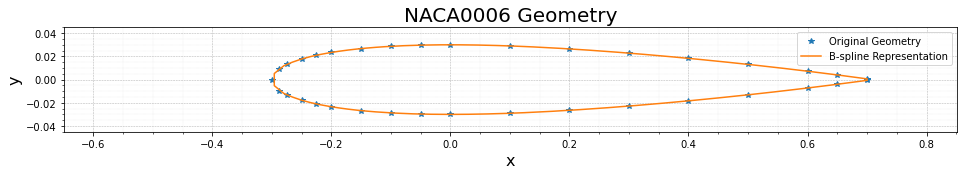

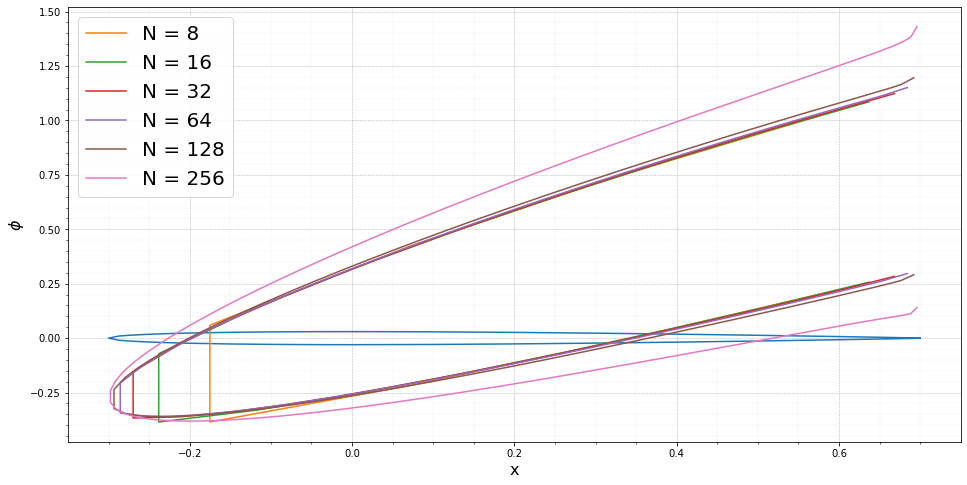

In [71]:
N = 128 + 1 
U0 = 1
AOA = 15
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
PlotAirfoil( N, airfoilName )

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='$\phi$', fontsize=16)
plt.plot( X, Y )

for k in range( 3, 9 ): 
    N = 2**k
    
    ## generate system of eqns
    A, b, x, y, xc, yc = DirichletConstantStrengthDoubletMethod( X, Y, N, U0, AOA )
    nu = np.linalg.solve( A, b )
    print( -nu[-1]*2 )
    nu = nu[:-1]

    plt.plot( xc, nu, label="N = " + str(N) )
ax.legend(fontsize=20)





## 2. Constant-Strength Potential Panel Method


In [69]:
%run DirichletConstantPotentialPanelMethod.ipynb

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
8.050132647014446e-14
4.7818690328825745e-14
1.7177421605658836e-14
1.168814438184541e-13
-1.8539816707978552e-13
1.5584774639217334e-12
[[-5.000e-01 -6.497e-05 -5.174e-05 ... -4.273e-02 -3.630e-01  3.605e-02]
 [-6.497e-05 -5.000e-01 -6.459e-05 ... -2.981e-01 -6.603e-02  1.948e-02]
 [-5.190e-05 -6.459e-05 -5.000e-01 ... -7.867e-02 -2.069e-02  1.607e-02]
 ...
 [-6.603e-02 -2.981e-01 -5.957e-02 ... -5.000e-01 -6.497e-05 -1.948e-02]
 [-3.630e-01 -4.273e-02 -9.481e-03 ... -6.497e-05 -5.000e-01 -3.605e-02]
 [ 1.000e+00 -0.000e+00 -0.000e+00 ... -0.000e+00 -1.000e+00 -1.000e+00]]


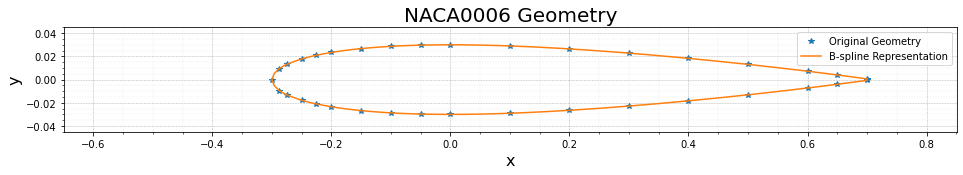

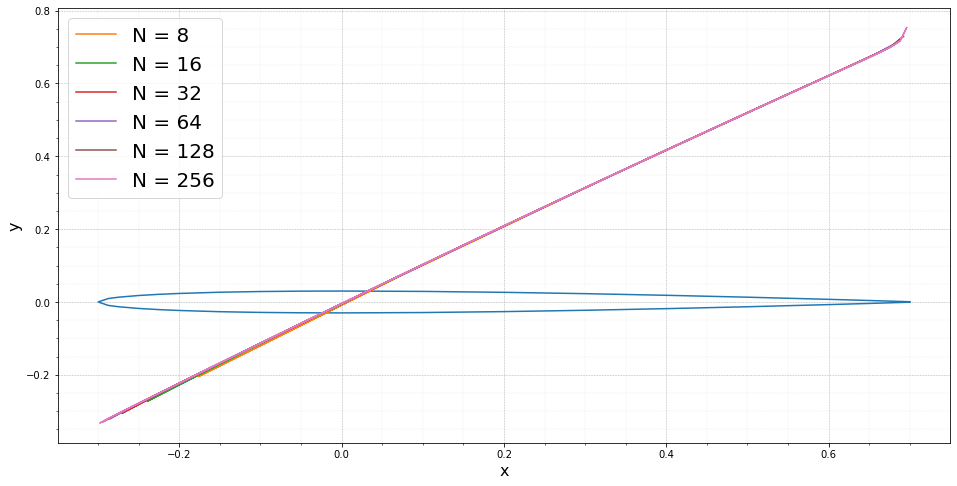

In [70]:
N = 256
U0 = 1
AOA = 0
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
PlotAirfoil( N, airfoilName )

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )

for k in range( 3, 9 ):
    N = 2**k

    A, b, x, y, xc, yc = DirichletConstantPotentialPanelMethod( X, Y, N, U0, AOA )


    nu = np.linalg.solve( A, b )
    # nu, res, rank, s  = np.linalg.lstsq( A, b )
    print( nu[-1]*2 )
    nu = nu[:-1]
    
    plt.plot( xc, nu, label="N = " + str(N) )

ax.legend(fontsize=20)
print( A )

## 3. Linear-Strength Doublet Element Method


In [22]:
%run DirichletLinearStrengthDoubletMethod.ipynb

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
2.1718904027965862e-13
6.312345867101365e-13
1.1533523749603344e-12
1.0024520297491882e-11
-1.3703039213173601e-11
[[-0.234 -0.237 -0.001 ...  0.002 -0.244 -0.244]
 [-0.002 -0.237 -0.239 ... -0.207 -0.218 -0.012]
 [ 0.001 -0.001 -0.239 ... -0.185 -0.037 -0.007]
 ...
 [-0.007 -0.037 -0.185 ... -0.239 -0.001  0.001]
 [-0.012 -0.218 -0.207 ... -0.239 -0.237 -0.002]
 [-0.244 -0.244  0.002 ... -0.001 -0.237 -0.234]]


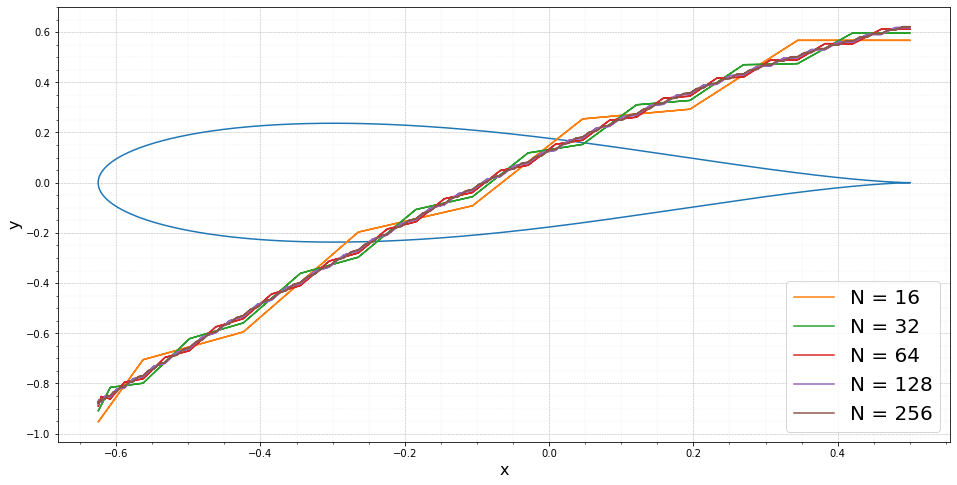

In [24]:
N = 40
U0 = 1
AOA = 0
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# PlotAirfoil( N, airfoilName )
M = 1024
## create geometry
c = 1
e = 0.5
a = c * ( 1 + e ) / 4

t = np.linspace( 0, 1, M )
X0 = - e * c / 4
X = a * np.cos( 2 * pi * t ) + X0
Y = a * np.sin( 2 * pi * t )
Z = X + 1j*Y
Z = Z + c**2/Z/16
X = np.real(Z)
Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )


for k in range( 4,  9):
    N = 2**k

    A, b, x, y, xc, yc = DirichletLinearStrengthDoubletMethod( X, Y, N, U0, AOA )


    nu = np.linalg.solve( A, b )
#     nu, res, rank, s  = np.linalg.lstsq( A, b )
    print( nu[-1]*2 )
    nu = nu[:-1]
    
    plt.plot( x, nu, label="N = " + str(N) )

print( A[:-2, :-1] )
# ax.legend()
ax.legend(fontsize=20)

## 4. Linear-Strength Source Element & Linear-Strength Doublet Element Method


In [27]:
%run DirichletLinearStrengthSourceDoubletMethod.ipynb

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
1.2883732405309474
1.3891572604398807
1.454078616118781
1.5029780824629477
1.5395597025915924


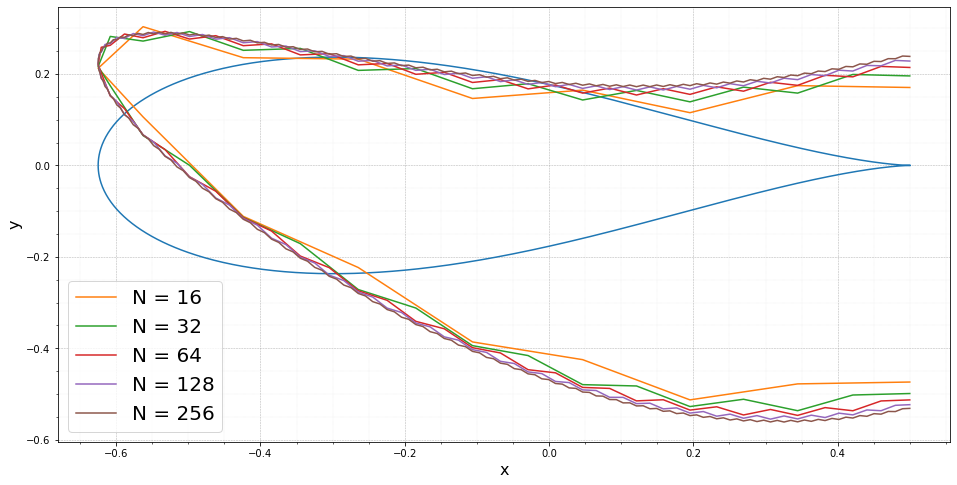

In [72]:
N = 128
U0 = 1
AOA = 10
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# PlotAirfoil( N, airfoilName )
M = 1024
## create geometry
c = 1
e = 0.5
a = c * ( 1 + e ) / 4

t = np.linspace( 0, 1, M )
X0 = - e * c / 4
X = a * np.cos( 2 * pi * t ) + X0
Y = a * np.sin( 2 * pi * t )
Z = X + 1j*Y
Z = Z + c**2/Z/16
X = np.real(Z)
Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )

for k in range( 4,  9):
    N = 2**k

    A, b, x, y, xc, yc = DirichletLinearStrengthSourceDoubletMethod( X, Y, N, U0, AOA )


    nu = np.linalg.solve( A, b )
#     nu, res, rank, s  = np.linalg.lstsq( A, b )
    print( nu[-1]*2 )
    nu = nu[:-1]
    
    plt.plot( x, nu, label="N = " + str(N) )

# print( A[:-2, :-1] )
ax.legend(fontsize=20)

## 8. Boundary Integral Method using Trapezoidal Rule


In [29]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly, curvature ):
    rj2 = (x - xj)**2 + (y - yj)**2
    if rj2 >1e-6:
        dGdr = ( 1 / 2 / pi ) / rj2 
        gradrn = normalx * (x - xj) + normaly * (y - yj)
        return -dGdr * gradrn
    else:
        return curvature/2/pi


def trapQuad( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    x, y = computeNodeLocations( N+1, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeNormParameterizationDerivative( N+1, tck )
    nx, ny = computeNormal( N+1, tck )
    binormal = computeBinormal( N+1, tck )
    curvature = computeCurvature( N+1, tck )
    c = computeChordLength( X )

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    ## generate system of equations
    A = np.identity( N+2 )*4
    b = np.zeros( N+2 )
    dt = 1/ N
    

    ## matrix influence due to airfoil
    for i in range( N+1 ):
        b[i] = U0 * ( x[i] * np.cos( AOA * pi / 180 ) +  y[i] * np.sin( AOA * pi / 180 ) )
        for j in range( N ):
            gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j], curvature[i] ) * ds_dt[j] * dt / 2
            gij2 = computeGreenNormal2D( x[i], y[i], x[j+1], y[j+1], nx[j+1], ny[j+1], curvature[i] ) * ds_dt[j+1] * dt / 2
            ## first comp
            if i != j:# and not( i == 0 and j == N):
                A[i, i] = A[i, i] - gij1
                A[i, j] = A[i, j] + gij1
            
            ## second comp
            if i != j+1: #and not( i == N+1 and j == 0): 
                A[i, i] = A[i, i] - gij2 
                A[i, j+1] = A[i, j+1] + gij2 
            
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    
    for i in range( N+1 ):
        aik = PHICD( x[i], y[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] + aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1     
    
    return A, b, x, y


        









In [30]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly, curvature ):
    rj2 = (x - xj)**2 + (y - yj)**2
    if rj2 >1e-6:
        dGdr = ( 1 / 2 / pi ) / rj2 
        gradrn = normalx * (x - xj) + normaly * (y - yj)
        return -dGdr * gradrn
    else:
        return curvature/4/pi


def trapQuad( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    x, y = computeNodeLocations( N+1, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeNormParameterizationDerivative( N+1, tck )
    nx, ny = computeNormal( N+1, tck )
    binormal = computeBinormal( N+1, tck )
    curvature = computeCurvature( N+1, tck )
    c = computeChordLength( X )
    xc, yc = computeCollocationNodeLocations( N+1, tck )

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    ## generate system of equations
    A = np.identity( N+2 )/2
    b = np.zeros( N+2 )
    dt = 1/ N
    

    ## matrix influence due to airfoil
    for i in range( N ):
        b[i] = U0 * ( xc[i] * np.cos( AOA * pi / 180 ) +  yc[i] * np.sin( AOA * pi / 180 ) )
        for j in range( N ):
            gij1 = computeGreenNormal2D( xc[i], yc[i], x[j], y[j], nx[j], ny[j], curvature[i] ) * ds_dt[j] * dt / 2
            gij2 = computeGreenNormal2D( xc[i], yc[i], x[j+1], y[j+1], nx[j+1], ny[j+1], curvature[i] ) * ds_dt[j+1] * dt / 2
            ## first comp
            A[i, j] = A[i, j] + gij1
            
            ## second comp
            A[i, j+1] = A[i, j+1] + gij2 
        
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    
    for i in range( N ):
        aik = PHICD( xc[i], yc[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] + aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1
    A[-2, 0] = -1; A[-2, 1] = 1; A[-2, -3] = 1; A[-2, -2] = -1; 
    
    return A, b, x, y


        










In [31]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly, curvature ):
    rj2 = (x - xj)**2 + (y - yj)**2
    if rj2 >1e-6:
        dGdr = ( 1 / 2 / pi ) / rj2 
        gradrn = normalx * (x - xj) + normaly * (y - yj)
        return -dGdr * gradrn
    else:
        return -curvature/4/pi


def trapQuad( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    x, y = computeNodeLocations( N+1, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeNormParameterizationDerivative( N+1, tck )
    nx, ny = computeNormal( N+1, tck )
    binormal = computeBinormal( N+1, tck )
    curvature = computeCurvature( N+1, tck )
    c = computeChordLength( X )
    xc, yc = computeCollocationNodeLocations( N+1, tck )

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    ## generate system of equations
    A = np.identity( N+2 )
    b = np.zeros( N+2 )
    dt = 1/ N
    

    ## matrix influence due to airfoil
    for i in range( N ):
        b[i] = U0 * ( x[i] * np.cos( AOA * pi / 180 ) +  y[i] * np.sin( AOA * pi / 180 ) )
        for j in range( N ):
            gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j], curvature[i] ) * ds_dt[j] * dt / 2
            gij2 = computeGreenNormal2D( x[i], y[i], x[j+1], y[j+1], nx[j+1], ny[j+1], curvature[i] ) * ds_dt[j+1] * dt / 2
            ## first comp
            if i != j:
                A[i, i] = A[i, i] - gij1
                A[i, j] = A[i, j] + gij1
            
            ## second comp
            if i != j+1:
                A[i, i] = A[i, i] - gij2
                A[i, j+1] = A[i, j+1] + gij2 
        
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    
    for i in range( N ):
        aik = PHICD( x[i], y[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] - aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1
    A[-2, 0] = -1; A[-2, 1] = 1; A[-2, -3] = 1; A[-2, -2] = -1; 
    
    return A, b, x, y


        











/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[-2.989e-02  1.643e-04  1.120e-04 ...  3.273e-03  1.268e-02  9.897e-01]
 [-5.622e-06  1.832e-01  1.272e-04 ...  3.233e-02  7.266e-01  1.705e-02]
 [ 2.141e-05  2.950e-05  3.911e-01 ...  4.480e-01  5.226e-02  7.006e-03]
 ...
 [ 7.006e-03  5.226e-02  4.480e-01 ...  3.911e-01  2.950e-05  2.141e-05]
 [ 1.705e-02  7.266e-01  3.233e-02 ...  1.272e-04  1.832e-01 -5.622e-06]
 [-1.000e+00  1.000e+00  0.000e+00 ...  0.000e+00  1.000e+00 -1.000e+00]]
0.03363405129082799


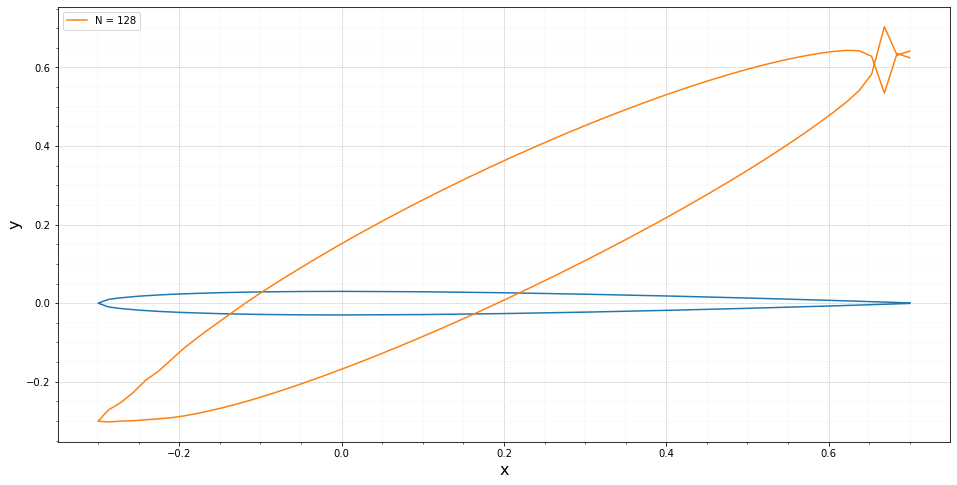

In [32]:
N = 128
U0 = 1
AOA = 25
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# PlotAirfoil( N, airfoilName )


# M = 1024
# ## create geometry
# c = 1
# e = 0.5
# a = c * ( 1 + e ) / 4

# t = np.linspace( 0, 1, M )
# X0 = - e * c / 4
# X = a * np.cos( 2 * pi * t ) + X0
# Y = a * np.sin( 2 * pi * t )
# Z = X + 1j*Y
# Z = Z + c**2/Z/16
# X = np.real(Z)
# Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )




A, b, x, y = trapQuad( X, Y, N, U0, AOA )
print( A[:-1, :-1] )


nu = np.linalg.solve( A, b )
print( nu[-1]*2 )
nu = nu[:-1]

plt.plot( x, nu, label="N = " + str(N) )


ax.legend()





# for k in range( 4,  9):
#     N = 2**k

#     A, b, x, y = trapQuad( X, Y, N, U0, AOA )


#     nu = np.linalg.solve( A, b )
# #     nu, res, rank, s  = np.linalg.lstsq( A, b )
#     print( nu[-1]*2 )
#     nu = nu[:-1]
    
#     plt.plot( x, nu, label="N = " + str(N) )

# print( A[:-2, :-1] )
# ax.legend()

## 9. Boundary Integral Method using Midpoint Rule


In [43]:
%run geometryMidpoint.ipynb

In [46]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly, curvature ):
    rj2 = (x - xj)**2 + (y - yj)**2
    if rj2 >1e-6:
        dGdr = ( 1 / 2 / pi ) / rj2
        gradrn = normalx * (x - xj) + normaly * (y - yj)
        return -dGdr * gradrn
    else:
        return -curvature/4/pi


def trapMid( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    x, y = computeNodeLocations( N+1, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeNormParameterizationDerivative( N+1, tck )
    nx, ny = computeNormal( N+1, tck )
    binormal = computeBinormal( N+1, tck )
    curvature = computeCurvature( N+1, tck )
    c = computeChordLength( X )

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    ## generate system of equations
    A = np.identity( N+1 )/2
    b = np.zeros( N+1 )
    dt = 1/ N
    

    ## matrix influence due to airfoil
    for i in range( N ):
        b[i] = U0 * ( x[i] * np.cos( AOA * pi / 180 ) +  y[i] * np.sin( AOA * pi / 180 ) )
        for j in range( N ):
            gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j], curvature[i] ) * ds_dt[j] * dt 
            ## first comp
            if i != j:
                A[i, i] = A[i, i] - gij1
                A[i, j] = A[i, j] + gij1
        
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    
    for i in range( N ):
        aik = PHICD( x[i], y[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] + aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1
    
    return A, b, x, y


        












/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[-9.924e-01  1.902e-04  1.655e-04 ...  1.718e-02  1.445e+00 -7.214e-07]
 [ 1.217e-04 -2.660e-01  1.446e-04 ...  6.490e-01  3.795e-02 -1.606e-06]
 [ 1.541e-04  1.825e-04 -9.883e-02 ...  5.469e-02  1.488e-02 -2.459e-06]
 ...
 [ 3.795e-02  6.490e-01  3.573e-02 ... -2.660e-01  1.217e-04  1.606e-06]
 [ 1.445e+00  1.718e-02  4.483e-03 ...  1.902e-04 -9.924e-01  7.214e-07]
 [ 1.000e+00  0.000e+00  0.000e+00 ...  0.000e+00 -1.000e+00  1.000e+00]]
-7.239371513726682e-16


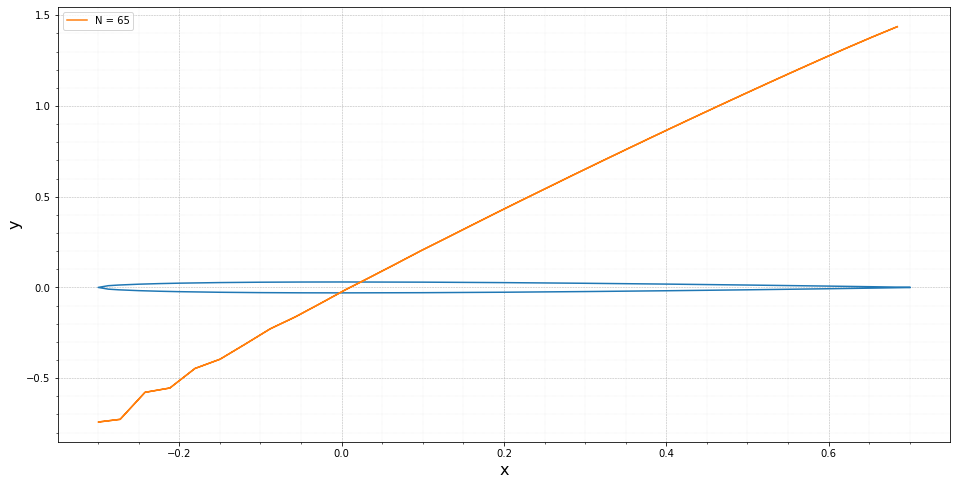

In [47]:
N = 64+1
U0 = 1
AOA = 0
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# PlotAirfoil( N, airfoilName )


# M = 1024
# ## create geometry
# c = 1
# e = 0.5
# a = c * ( 1 + e ) / 4

# t = np.linspace( 0, 1, M )
# X0 = - e * c / 4
# X = a * np.cos( 2 * pi * t ) + X0
# Y = a * np.sin( 2 * pi * t )
# Z = X + 1j*Y
# Z = Z + c**2/Z/16
# X = np.real(Z)
# Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )




A, b, x, y = trapMid( X, Y, N, U0, AOA )
# print( A[:-1, :-1] )
print(A)


nu = np.linalg.solve( A, b )
print( nu[-1]*2 )
nu = nu[:-1]

plt.plot( x, nu, label="N = " + str(N) )


ax.legend()




# for k in range( 4,  9):
#     N = 2**k

#     A, b, x, y = trapQuad( X, Y, N, U0, AOA )


#     nu = np.linalg.solve( A, b )
# #     nu, res, rank, s  = np.linalg.lstsq( A, b )
#     print( nu[-1]*2 )
#     nu = nu[:-1]
    
#     plt.plot( x, nu, label="N = " + str(N) )

# print( A[:-2, :-1] )
# ax.legend()

## 10. Boundary Integral Method using Gauss Quadrature

In [96]:
%run geometryGauss.ipynb


In [97]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly, curvature ):
    rj2 = (x - xj)**2 + (y - yj)**2
    if rj2 >1e-6:
        dGdr = ( 1 / 2 / pi ) / rj2
        gradrn = normalx * (x - xj) + normaly * (y - yj)
        return -dGdr * gradrn
    else:
        return curvature/4/pi


def gaussQuad( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    t, w = gaussLegendreParameter( N )
    x, y = computeGaussNodeLocations( t, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeGaussNormParameterizationDerivative( t, tck )
    nx, ny = computeGaussNormal( t, tck )
    binormal = computeGaussBinormal( t, tck )
    curvature = computeGaussCurvature( t, tck )
    c = computeChordLength( X )

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    
    ## generate system of equations
    A = np.identity( 2*N+1 )
    b = np.zeros( 2*N+1 )
    

    ## matrix influence due to airfoil
    for i in range( 2*N ):
        b[i] = U0 * ( x[i] * np.cos( AOA * pi / 180 ) +  y[i] * np.sin( AOA * pi / 180 ) )
        for j in range( 2*N ):
            gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j], curvature[i] ) * ds_dt[j] * w[j] 
            ## first comp
            if i != j:
                A[i, i] = A[i, i] - gij1
                A[i, j] = A[i, j] + gij1
        
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    
    for i in range( N ):
        aik = PHICD( x[i], y[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] + aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1
    
    return A, b, x, y


        













/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[-2.484e+00 -8.403e-03 -5.321e-03 -9.122e-04  4.004e-03  8.704e-03
   1.204e-02  8.504e-03  8.510e-03  1.208e-02  8.801e-03  4.202e-03
  -4.747e-04 -4.103e-03 -2.311e-03  3.439e+00]
 [-5.486e-03  1.911e-01 -3.634e-03  4.540e-04  5.205e-03  9.850e-03
   1.320e-02  9.302e-03  9.373e-03  1.375e-02  1.117e-02  8.077e-03
   7.805e-03  2.715e-02  6.776e-01  2.510e-02]
 [-3.695e-03 -4.152e-03  4.656e-01  2.224e-03  6.977e-03  1.174e-02
   1.533e-02  1.092e-02  1.124e-02  1.779e-02  1.801e-02  2.259e-02
   5.636e-02  2.918e-01  6.690e-02  1.042e-02]
 [-2.481e-03 -2.444e-03  1.205e-04  5.025e-01  9.276e-03  1.448e-02
   1.876e-02  1.380e-02  1.477e-02  2.648e-02  3.585e-02  7.044e-02
   1.737e-01  9.219e-02  2.641e-02  6.140e-03]
 [-1.550e-03 -8.930e-04  2.081e-03  6.658e-03  5.122e-01  1.837e-02
   2.418e-02  1.883e-02  2.132e-02  4.443e-02  7.491e-02  1.263e-01
   9.394e-02  3.996e-02  1.519e-02  4.018e-03]
 [-7.608e-

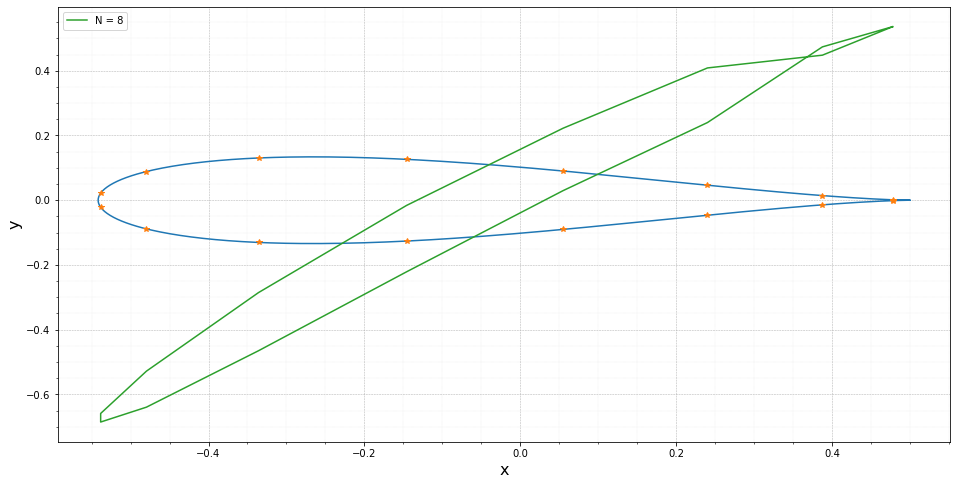

In [98]:
N = 8
U0 = 1
AOA = 10
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# Y = 5*Y
# PlotAirfoil( N, airfoilName )


M = 512
## create geometry
c = 1
e = 0.25
a = c * ( 1 + e ) / 4

t = np.linspace( 0, 1, M )
X0 = - e * c / 4
X = a * np.cos( 2 * pi * t ) + X0
Y = a * np.sin( 2 * pi * t )
Z = X + 1j*Y
Z = Z + c**2/Z/16
X = np.real(Z)
Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )




A, b, x, y = gaussQuad( X, Y, N, U0, AOA )
print( A[:-1, :-1] )
# print(A)


nu = np.linalg.solve( A, b )
print( nu[-1] )
nu = nu[:-1]
plt.plot( x, y, '*')
plt.plot( x, nu, label="N = " + str(N) )


ax.legend()




In [114]:
def PHICD( x, y, x1, y1, x2, y2 ):
    ## transform from global coordinates to panel coordinates (coordinates)
    xp, yp, xp1, yp1, xp2, yp2, alpha = GlobalToPanelCoords( x, y, x1, y1, x2, y2 )
    
    ## compute induced velocity potential by the doublet element (in panel coordinates)
    th1 = atan2( yp, xp-xp1 ); th2 = atan2( yp, xp-xp2 )
    phi = -( th2 - th1 )/2/pi
    return phi 


def computeGreenNormal2D( x, y, xj, yj , normalx, normaly ):
    rj2 = (x - xj)**2 + (y - yj)**2
    dGdr = ( 1 / 2 / pi ) / rj2#**.5
    gradrn = normalx * (x - xj) + normaly * (y - yj)
    return -dGdr * gradrn

def gaussQuadReg( X, Y, N, U0, AOA ):
    ## check if the geometry has sharp trailing edge
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        tck = createSplines( X, Y )
    t, w = gaussLegendreParameter( N )
    x, y = computeGaussNodeLocations( t, tck )
    theta = np.arctan2( y[:], x[:] )
    ds_dt = computeGaussNormParameterizationDerivative( t, tck )
    nx, ny = computeGaussNormal( t, tck )
    binormal = computeGaussBinormal( t, tck )
    curvature = computeGaussCurvature( t, tck )
    c = computeChordLength( X )
    

    ## correct normal direction
    nx = binormal * nx
    ny = binormal * ny
    
    
    ## generate system of equations
    A = np.identity( 2*N+1 )*0
    b = np.zeros( 2*N+1 )
    T = np.linspace(0, 1, 3)
    xh, yh = computeGaussNodeLocations( T, tck )
    
    ## matrix influence due to airfoil
    for i in range( 2*N ):
        b[i] = U0 * ( x[i] * cos( AOA * pi / 180 ) +  y[i] * sin( AOA * pi / 180 ) )
        k = 2*N-i-1
        ## add subtended angle
        l1t1 = (xh[0] - x[i])*(xh[1]-x[i]) + (yh[0]-y[i])*(yh[1]-y[i])
        l1t1 = l1t1 / ( sqrt((xh[0] - x[i])**2 + (yh[0]-y[i])**2) * ( sqrt((xh[1]-x[i])**2 + (yh[1]-y[i])**2) ) )
        
        l2t2 = (xh[2] - x[i])*(xh[1]-x[i]) + (yh[2]-y[i])*(yh[1]-y[i])
        l2t2 = l2t2 / ( sqrt((xh[2] - x[i])**2 + (yh[2]-y[i])**2) * ( sqrt((xh[1]-x[i])**2 + (yh[1]-y[i])**2) ) )
        
        I1 = acos( l1t1 )/pi/2
        I2 = acos( l2t2 )/pi/2
        A[i, k] = A[i, k] + I1
        A[i, i] = A[i, i] + (1 - I1)
        if i < N: ## c1
#             A[i, k] = A[i, k] + I1
#             A[i, i] = A[i, i] + 1 - I1
            for j in range( 2*N ):
                gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j]) * w[j] * ds_dt[j] 
                if j < N: ## same curve ## c1
                    if j != i:
                        A[i, i] = A[i, i] - gij1
                        A[i, j] = A[i, j] + gij1

                else: ## diff curve ## c2
                    if j != k:
                        A[i, k] = A[i, k] - gij1
                        A[i, j] = A[i, j] + gij1

            
        else: ## c2
#             A[i, i] = A[i, i] + I1
#             A[i, k] = A[i, k] + 1 - I1
            for j in range( 2*N ):
                gij1 = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[j], ny[j] ) * w[j] * ds_dt[j] 
                if j < N: ## diff curve ## c2
                    if j != k:
                        A[i, k] = A[i, k] - gij1
                        A[i, j] = A[i, j] + gij1
                    
                else: ## same curve ## c1
                    if j != i:
                        A[i, i] = A[i, i] - gij1
                        A[i, j] = A[i, j] + gij1

                    
    ## matrix influence due to wake
    # create wake representation
    tckw = createWakeGeometry( X, Y, AOA )
    xw, yw = computeNodeLocations( 3, tckw )
    nxw, nyw = computeWakeNormal( 3, AOA )
    for i in range( 2*N ):
        aik = PHICD( x[i], y[i], xw[0], yw[0], xw[-1], yw[-1] )
        A[i, -1] = A[i, -1] - aik
#         A[i, 0] = A[i, 0] - aik

    ## kutta condition
    A[-1, 0] = 1; A[-1, -2] = -1; A[-1, -1] = 1
    
    return A, b, x, y
            

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[ 0.497 -0.003 -0.003 ... -0.003 -0.001  0.49 ]
 [-0.002  0.498 -0.003 ...  0.007  0.464  0.007]
 [-0.001 -0.002  0.498 ...  0.418  0.021  0.003]
 ...
 [ 0.003  0.021  0.418 ...  0.498 -0.002 -0.001]
 [ 0.007  0.464  0.007 ... -0.003  0.498 -0.002]
 [ 0.49  -0.001 -0.003 ... -0.003 -0.003  0.497]]
-1.0163265538363278


/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


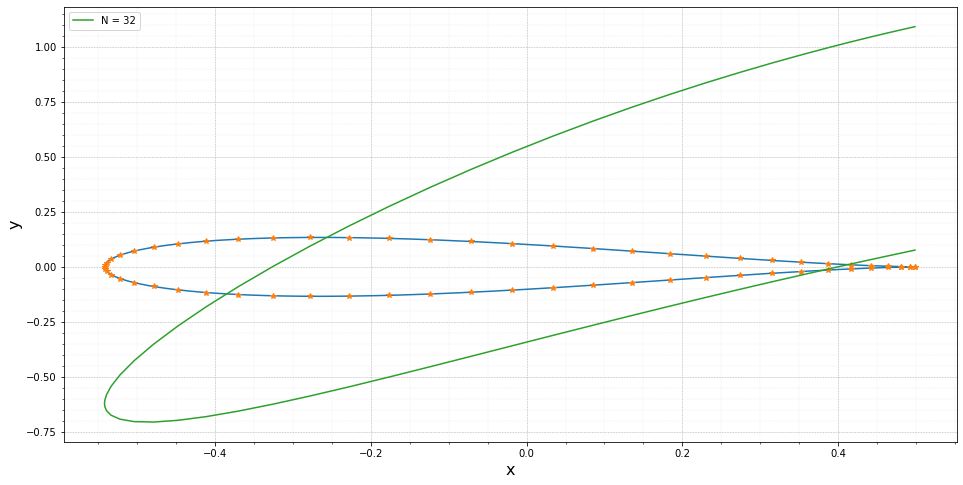

In [117]:
N = 32
U0 = 1
AOA = 15
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# Y = 5*Y
# PlotAirfoil( N, airfoilName )


M = 512
## create geometry
c = 1
e = 0.25
a = c * ( 1 + e ) / 4

t = np.linspace( 0, 1, M )
X0 = - e * c / 4
X = a * np.cos( 2 * pi * t ) + X0
Y = a * np.sin( 2 * pi * t )
Z = X + 1j*Y
Z = Z + c**2/Z/16
X = np.real(Z)
Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )




A, b, x, y = gaussQuadReg( X, Y, N, U0, AOA )
print( A[:-1, :-1] )
# print(A)


nu = np.linalg.solve( A, b )
print( nu[-1] )
nu = nu[:-1]
plt.plot( x, y, '*')
plt.plot( x, nu, label="N = " + str(N) )


ax.legend()



/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[ 0.497 -0.003 -0.003 ... -0.003 -0.001  0.49 ]
 [-0.002  0.498 -0.003 ...  0.007  0.464  0.007]
 [-0.001 -0.002  0.498 ...  0.418  0.021  0.003]
 ...
 [ 0.003  0.021  0.418 ...  0.498 -0.002 -0.001]
 [ 0.007  0.464  0.007 ... -0.003  0.498 -0.002]
 [ 0.49  -0.001 -0.003 ... -0.003 -0.003  0.497]]
-1.0163265538363278


/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


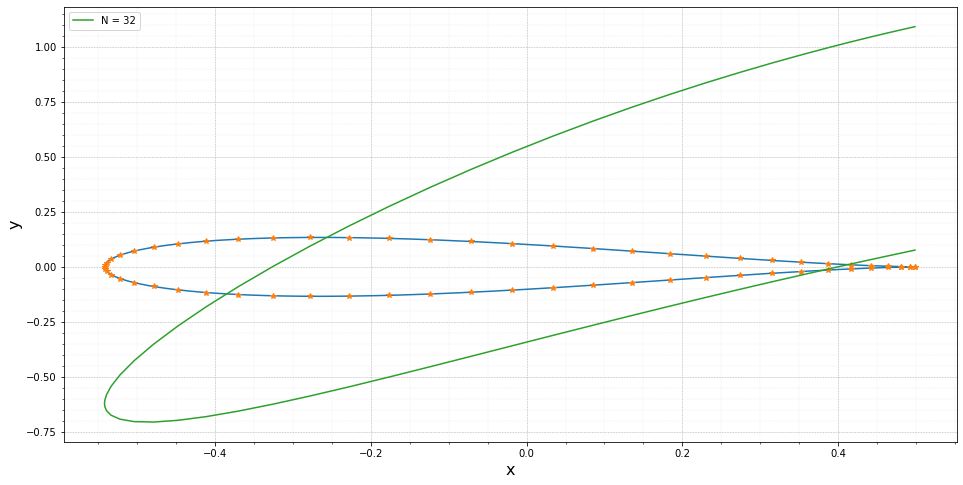

In [123]:
N = 32
U0 = 1


AOA = 15
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# Y = 5*Y
# PlotAirfoil( N, airfoilName )


M = 512
## create geometry
c = 1
e = 0.25
a = c * ( 1 + e ) / 4

t = np.linspace( 0, 1, M )
X0 = - e * c / 4
X = a * np.cos( 2 * pi * t ) + X0
Y = a * np.sin( 2 * pi * t )
Z = X + 1j*Y
Z = Z + c**2/Z/16
X = np.real(Z)
Y = np.imag(Z)

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
plt.plot( X, Y )




A, b, x, y = gaussQuadReg( X, Y, N, U0, AOA )
print( A[:-1, :-1] )
# print(A)


nu = np.linalg.solve( A, b )
print( nu[-1] )
nu = nu[:-1]
plt.plot( x, y, '*')
plt.plot( x, nu, label="N = " + str(N) )


ax.legend()


